In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [2]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure1'

In [3]:
import plot_all_fr_map_x_pwc_one_session as plotfm
reload(plotfm)

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


<module 'plot_all_fr_map_x_pwc_one_session' from '/mnt/home/szheng/projects/place_variability/code/plot_all_fr_map_x_pwc_one_session.py'>

In [124]:
plotfm.main(subdb['data_dir_full'][0])

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/0_0.0_uid3_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/0_0.0_uid27_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/0_0.0_uid29_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/0_0.0_uid29_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/f


KeyboardInterrupt



# load all session

In [4]:
subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')

In [5]:
import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

In [5]:
%%time
import glob
# load cell metrics
cell_metrics_all = {}
mergepoints_all = {}
for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    cell_metrics=glob.glob(os.path.join(data_dir_full,'*cell_metrics.cellinfo.mat'))[0]
    cell_metrics = dpn.loadmat_full(cell_metrics,'cell_metrics')
    cell_metrics_all[ani,sess] = cell_metrics
    
    mergepoints=glob.glob(os.path.join(data_dir_full,'*MergePoints*.mat'))[0]
    mergepoints = dpn.loadmat_full(mergepoints,'MergePoints')
    mergepoints_all[ani,sess] = mergepoints


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


CPU times: user 1min 58s, sys: 12.5 s, total: 2min 11s
Wall time: 2min 28s


# load all switch related

In [90]:
reload(dpp)

<module 'data_prep_pyn' from '/mnt/home/szheng/projects/util_code/data_prep_pyn.py'>

In [197]:
reload(tcp)

<module 'test_change_point' from '/mnt/home/szheng/projects/place_variability/code/test_change_point.py'>

In [198]:
# # update sw res, after an error on significance test
# for ind,row in subdb.iterrows():
#     data_dir_full = row['data_dir_full']
#     ani = ind[0]
#     sess = row['sess_name']
#     sw_res_fn = os.path.join(data_dir_full,'py_data','sw_res_afterheadscan.p')
#     try:
#         tcp.correct_detect_switch_all_steps(sw_res_fn)
#     except Exception as e:
#         print(f"{sess} failed\n")
#         print(e)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan.p updated
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/sw_res_afterheadscan.p updated
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/sw_res_afterheadscan.p updated
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/sw_res_afterheadscan.p updated
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/sw_res_afterheadscan.p updated
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/sw_res_afterheadscan.p updated
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/sw_res_afterheadscan.p updated
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/sw_res_afterheadscan.p updated
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211213/py_data/sw_res_afterheadscan.p updated
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212/py_

In [6]:
%%time
all_fields_recombined_all = {}
pf_params_recombined_all = {}
fr_map_trial_df_all = {}
pval_all = {}
best_n_all = {}
X_pwc_all = {}
X_raw_all = {}
changes_df_all = {}
var_res_all = {}
corr_all = {}
all_sw_d_all = {}
all_sw_with_metrics_d_all = {}
trial_index_to_index_within_df_all = {}

for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    
    res=dpp.load_spk_beh_df(data_dir_full,load_only=True)
    if res is not None:
        spk_beh_df = res['spk_beh_df']
        trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df)
        trial_index_to_index_within_df_all[ani,sess] = trial_index_to_index_within_df
        

    pf_res_recombine = pfrc.main(data_dir_full,force_reload=False,load_only=True)

    all_fields_recombined=pf_res_recombine['all_fields_recombined']
    all_fields_recombined_all[ani,sess] = all_fields_recombined
    pf_params_recombined = pf_res_recombine['params_recombined']
    pf_params_recombined_all[ani,sess] = pf_params_recombined

    fr_map_all = fmos.main(data_dir_full,force_reload=False,load_only=True)
    fr_map_trial_df = fr_map_all['fr_map_trial_df']
    fr_map_trial_df_all[ani,sess] = fr_map_trial_df



    sw_res = sdos.main(data_dir_full,force_reload=False,load_only=True)
    pval = sw_res['pval']
    pval_all[ani,sess]=pval
    best_n = sw_res['best_n']
    best_n_all[ani,sess] = best_n
    X_pwc = sw_res['X_pwc']
    X_pwc_all[ani,sess] = X_pwc
    X_raw = sw_res['X_raw']
    X_raw_all[ani,sess]=X_raw
    changes_df = sw_res['changes_df']
    changes_df_all[ani,sess] = changes_df
    var_res = sw_res['var_res']
    var_res_all[ani,sess]=var_res
    corr = sw_res['corr']
    corr_all[ani,sess] = corr

    sw_info_res=gasam.main(data_dir_full,force_reload=False,load_only=True)
    if sw_info_res is None:
        sw_info_res=gasam.main(data_dir_full,force_reload=True,load_only=False)
    all_sw_d = sw_info_res['all_sw_d']
    all_sw_d_all[ani,sess] = all_sw_d
    all_sw_with_metrics_d = sw_info_res['all_sw_with_metrics_d']
    all_sw_with_metrics_d_all[ani,sess] = all_sw_with_metrics_d

all_fields_recombined_all = pd.concat(all_fields_recombined_all,axis=0)
pf_params_recombined_all = pd.concat(pf_params_recombined_all,axis=0)
fr_map_trial_df_all = pd.concat(fr_map_trial_df_all,axis=0)
pval_all = pd.concat(pval_all,axis=0)
X_pwc_all = pd.concat(X_pwc_all,axis=0)
X_raw_all = pd.concat(X_raw_all,axis=0)
changes_df_all = pd.concat(changes_df_all,axis=0)
var_res_all = pd.concat(var_res_all,axis=0)
corr_all = pd.concat(corr_all,axis=0)
all_sw_d_all = pd.concat(all_sw_d_all,axis=0)
all_sw_with_metrics_d_all = pd.concat(all_sw_with_metrics_d_all,axis=0)
best_n_all = pd.concat(best_n_all,axis=0)


/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201206/py_data/place_fie

In [67]:
all_fields_recombined_all.loc['e13_16f1','e13_16f1_210302'].loc[0,1]

/tmp/ipykernel_1223208/2663459156.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined_all.loc['e13_16f1','e13_16f1_210302'].loc[0,1]


start end com peak    fr_peak    fr_mean  other_field_index
    field_index                                                            
7   0               0   4   1    0   9.707606   7.668994                NaN
    3              87  99  93   99  14.290411  11.636348                NaN
8   1              85  91  87   86   5.400594   4.794216                NaN
9   2              41  45  42   42   5.053633   4.713195                NaN
    3              57  67  62   63   4.672798   4.383773                NaN
...               ...  ..  ..  ...        ...        ...                ...
133 1              47  60  53   53   3.531339   2.648932                NaN
134 1              35  40  37   39   2.190527   2.085822                NaN
    2              93  99  96   97   3.633672   3.317942                NaN
135 0              27  38  32   33   5.032298   4.067666                NaN
    1              48  52  49   49   2.985493   2.718383                NaN

[139 rows x 7 columns]

# distribution of p values

In [6]:
bins = 10**np.linspace(-2,0,10)
bins = np.insert(bins,0,0)

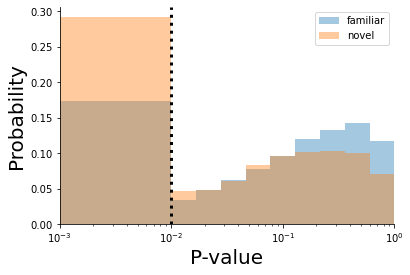

In [8]:
gpb = pval_all.groupby(level=2)
fig,ax=plt.subplots()
ax.spines[['right', 'top']].set_visible(False)
novel_str = ['familiar','novel']

for k,val in gpb:
    myarray=val.min(axis=1).values
    weights = np.ones_like(myarray) / len(myarray)
#     ax.hist(myarray, weights=weights,bins=100,label=novel_str[k],alpha=0.4)
    ax.hist(myarray, weights=weights,bins=bins,label=novel_str[k],alpha=0.4)
#     ax.hist(myarray, density=True,bins=bins,label=novel_str[k],alpha=0.4)

ax.set_xscale('log')
ax.set_xlim([0.001,1])
ax.set_ylabel('Probability')
ax.set_xlabel('P-value')
pval_thresh = 0.05 / pval_all.shape[1]
ax.axvline(pval_thresh,c='k',linestyle=':',linewidth=3)
ax.legend()
fn = os.path.join(figdir,'pval_xlog.pdf')
fig.savefig(fn,bbox_inches='tight')

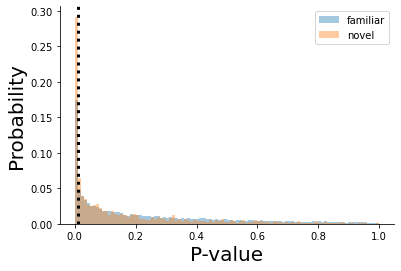

In [11]:
gpb = pval_all.groupby(level=2)
fig,ax=plt.subplots()
ax.spines[['right', 'top']].set_visible(False)
novel_str = ['familiar','novel']

for k,val in gpb:
    myarray=val.min(axis=1).values
    weights = np.ones_like(myarray) / len(myarray)
    ax.hist(myarray, weights=weights,bins=100,label=novel_str[k],alpha=0.4)
#     ax.hist(myarray, density=True,bins=bins,label=novel_str[k],alpha=0.4)


ax.set_ylabel('Probability')
ax.set_xlabel('P-value')
ax.legend()
pval_thresh = 0.05 / pval_all.shape[1]
ax.axvline(pval_thresh,c='k',linestyle=':',linewidth=3)

fn = os.path.join(figdir,'pval.pdf')
fig.savefig(fn,bbox_inches='tight')

# distribution of percentage significant per session

In [ ]:
best_n_all.groupby

In [13]:
ratio_sig_per_sess = best_n_all.groupby(level=(0,1,2)).apply(lambda x:(x>0).mean())

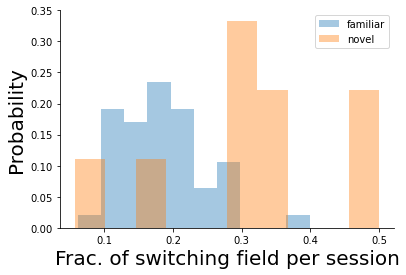

In [51]:
gpb = ratio_sig_per_sess.groupby(level=2)
fig,ax=plt.subplots()
ax.spines[['right', 'top']].set_visible(False)
novel_str = ['familiar','novel']
for k,val in gpb:
    myarray=val.values
    weights = np.ones_like(myarray) / len(myarray)
    ax.hist(myarray, weights=weights,bins=10,label=novel_str[k],alpha=0.4)
ax.set_ylabel('Probability')
ax.set_xlabel('Frac. of switching field per session')
ax.legend()
fn = os.path.join(figdir,'frac_switch_per_session.pdf')
fig.savefig(fn,bbox_inches='tight')

In [42]:
ani_sorted=toviolin.groupby('level_0').median().sort_values(0,ascending=False).index

e16_3m2   e16_3m2_211210   0    0.211838
          e16_3m2_211211   0    0.266447
                           1    0.057143
          e16_3m2_211212   0    0.246154
                           1    0.303279
          e16_3m2_211213   0    0.271642
                           1    0.286792
e13_26m1  e13_26m1_210913  0    0.398780
          e13_26m1_211019  0    0.284444
                           1    0.335211
          e13_26m1_211116  0    0.148485
                           1    0.299145
          e13_26m1_211119  0    0.230530
                           1    0.500000
          e13_26m1_211124  0    0.241259
e15_9f1   e15_9f1_200715   0    0.290000
          e15_9f1_200720   0    0.222973
          e15_9f1_200723   0    0.125786
          e15_9f1_200729   0    0.123552
          e15_9f1_200802   0    0.215385
e15_13f1  e15_13f1_220117  0    0.212610
          e15_13f1_220118  0    0.184922
                           1    0.479058
          e15_13f1_220119  0    0.214626
                

/tmp/ipykernel_1582640/4211039893.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  ani_sorted=ratio_sig_per_sess.groupby(level=0).median().sort_values(0,ascending=False).index


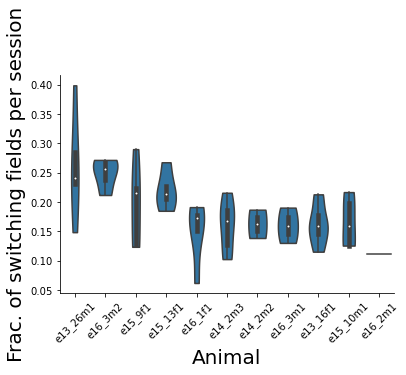

In [390]:
task_ind = 0
ani_sorted=ratio_sig_per_sess.groupby(level=0).median().sort_values(0,ascending=False).index
toviolin=ratio_sig_per_sess.loc[ani_sorted].loc[slice(None),slice(None),task_ind].reset_index()
ax=sns.violinplot(data=toviolin,x='level_0',y=0,cut=0,color='C0')
fig=ax.figure
ax.spines[['right', 'top']].set_visible(False)
xticklabels=ax.get_xticklabels()
ax.set_xticklabels(xticklabels,rotation=45)
ax.set_xlabel('Animal')
ax.set_ylabel('Frac. of switching fields per session')
fn = os.path.join(figdir,'frac_switch_per_session_per_animal.pdf')
fig.savefig(fn,bbox_inches='tight')

In [59]:
nfields_per_session=all_fields_recombined_all.groupby(level=(0,1,2)).count().iloc[:,0].loc[ani_sorted]

In [77]:
ntrials_per_session=changes_df_all.groupby(level=(0,1,2)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])

In [81]:
sw_ratio_ntrials_fields_df = pd.concat({'switch_ratio':ratio_sig_per_sess,'N_trials':ntrials_per_session,'N_fields':nfields_per_session},axis=1)

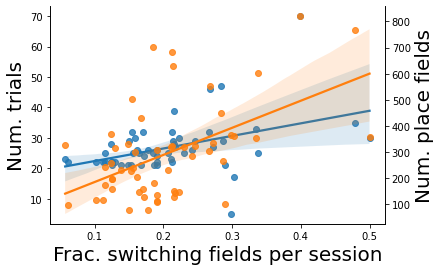

In [93]:
fig,ax=plt.subplots()
ax.spines[['top']].set_visible(False)
# ax.scatter(sw_ratio_ntrials_fields_df['switch_ratio'],sw_ratio_ntrials_fields_df['N_trials'])
sns.regplot(data=sw_ratio_ntrials_fields_df,x='switch_ratio',y='N_trials',ax=ax)
ax2=ax.twinx()
ax2.spines[['top']].set_visible(False)
# ax2.scatter(sw_ratio_ntrials_fields_df['switch_ratio'],sw_ratio_ntrials_fields_df['N_fields'],c='C1')
sns.regplot(data=sw_ratio_ntrials_fields_df,x='switch_ratio',y='N_fields',ax=ax2,color='C1')

ax.set_ylabel('Num. trials')
ax2.set_ylabel('Num. place fields')
ax.set_xlabel('Frac. switching fields per session')
fn = os.path.join(figdir,'frac_switch_vs_ntrials_nfields.pdf')
fig.savefig(fn,bbox_inches='tight')

# switching and fr stability

In [189]:
data_dir_full

'/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117'

In [200]:
mergepoints

['timestamps', 'timestamps_samples', 'firstlasttimpoints_samples', 'foldernames', 'filesmerged', 'filesizes', 'sizecheck', 'detectorinfo']

In [195]:
mergepoints['timestamps']

array([[    0.        ,  5616.60796667],
       [ 5616.608     ,  7716.63996667],
       [ 7716.64      , 13105.59996667],
       [13105.6       , 15049.02396667],
       [15049.024     , 19118.94396667],
       [19118.944     , 21627.77596667],
       [21627.776     , 27902.77596667],
       [27902.776     , 29653.11196667]])

In [206]:
behavior['timestamps']

array([ 5636.72603333,  5636.75936667,  5636.7927    , ...,
       15046.38553333, 15046.4189    , 15046.45223333])

In [376]:
def get_fr_in_interval_l(spk_times_l,interval_l):
    '''
    fr_l_all_interval: n_intervals x n_neurons
    mean fr within an interval for each neuron
    '''
    fr_l_all_interval = []
    for i in range(interval_l.shape[0]):
        interval = interval_l[i]
        fr_l = []
        for spk_t in spk_times_l:
            ma=(spk_t >=interval[0]) & (spk_t <interval[1])
            fr = ma.sum() / (interval[1] - interval[0])
            fr_l.append(fr)
        fr_l_all_interval.append(fr_l)
    fr_l_all_interval = np.array(fr_l_all_interval)
    return fr_l_all_interval

def get_fr_diff_sw_vs_non_sw(cell_metrics,mergepoints,best_n):
    '''
    old
    '''
    ntasks = len(best_n.index.get_level_values(0).unique())
    uid = cell_metrics['UID']
    spk_times_l = cell_metrics['spikes']['times']
    interval_l = mergepoints['timestamps']

    
    fr_l_all_interval = get_fr_in_interval_l(spk_times_l,interval_l)

    sw_ma = (best_n > 0).groupby(level=2).any()

    post_minus_pre_fr = fr_l_all_interval[1 +ntasks] - fr_l_all_interval[0] # assuming 0-pre and 2-post for 1 task, 3-post for 2 tasks
    post_minus_pre_fr_df =pd.DataFrame(post_minus_pre_fr,columns=['post_minus_pre'],index=uid)
    post_minus_pre_fr_df['any_switch'] = sw_ma
    post_minus_pre_fr_df = post_minus_pre_fr_df.dropna(axis=0)
    return post_minus_pre_fr_df

def get_fr_diff_sw_on_off_vs_non_sw(cell_metrics,mergepoints,all_sw_d,best_n):
    '''
    get fr difference post - pre, also categorize into: only having switching on, only having switching off, no switching, neurons
    post_minus_pre_fr_df: df: n_neurons x ['post_minus_pre','fr_post','fr_pre','switch_category']
    '''
    all_sw_d['switch_on'] = all_sw_d['switch']==1
    all_sw_d['switch_off'] = all_sw_d['switch']==-1
    on_ma = all_sw_d.groupby('uid')['switch_on'].all()
    off_ma = all_sw_d.groupby('uid')['switch_off'].all()
    
    ntasks = len(best_n.index.get_level_values(0).unique())
    uid = cell_metrics['UID']
    spk_times_l = cell_metrics['spikes']['times']
    interval_l = mergepoints['timestamps']

    
    fr_l_all_interval = get_fr_in_interval_l(spk_times_l,interval_l)

    no_sw_ma = (best_n == 0).groupby(level=2).all()
#     pdb.set_trace()
    
    assert np.diff(interval_l[1 +ntasks]) > (10 * 60) # each sleep epoch at least 10min
    assert np.diff(interval_l[0])> (10 * 60)

    post_minus_pre_fr = fr_l_all_interval[1 +ntasks] - fr_l_all_interval[0] # assuming 0-pre and 2-post for 1 task, 3-post for 2 tasks
    post_minus_pre_fr_df =pd.DataFrame(post_minus_pre_fr,columns=['post_minus_pre'],index=uid)
    post_minus_pre_fr_df['fr_post'] = fr_l_all_interval[1 +ntasks]
    post_minus_pre_fr_df['fr_pre'] = fr_l_all_interval[0]
    
    sw_category = np.zeros(post_minus_pre_fr_df.shape[0]) * np.nan
    sw_category = pd.Series(sw_category,index=uid)
    sw_category[on_ma.loc[on_ma].index] = 'on'
    sw_category[off_ma.loc[off_ma].index] = 'off'
    sw_category[no_sw_ma.loc[no_sw_ma].index] = 'no_switch'
    
    post_minus_pre_fr_df['switch_category'] = sw_category
    post_minus_pre_fr_df = post_minus_pre_fr_df.dropna(axis=0)


    return post_minus_pre_fr_df
    
    

In [371]:
post_minus_pre_fr_df

,post_minus_pre,fr_post,fr_pre,switch_category
4,-0.933303,0.857993,1.791296,on
6,-0.047271,2.559819,2.607090,no_switch
17,-0.899412,2.099690,2.999102,no_switch
19,-1.029916,2.260859,3.290775,no_switch
20,0.452356,2.604326,2.151970,no_switch
21,-0.369524,2.170721,2.540245,no_switch
22,-1.492965,2.576228,4.069193,on
24,2.192129,4.385500,2.193371,no_switch
28,-0.017158,1.220117,1.237275,on
29,-1.139398,1.002079,2.141476,off


In [377]:
post_minus_pre_fr_df_all = {}
for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']

    cell_metrics = cell_metrics_all[ani,sess]
    mergepoints = mergepoints_all[ani,sess]
    best_n = best_n_all[ani,sess]
    all_sw_d = all_sw_d_all.loc[ani,sess]

#     post_minus_pre_fr_df_all_tasks=get_fr_diff_sw_vs_non_sw(cell_metrics,mergepoints,best_n)
#     post_minus_pre_fr_df_all_tasks_all[ani,sess] = post_minus_pre_fr_df_all_tasks
    
    post_minus_pre_fr_df=get_fr_diff_sw_on_off_vs_non_sw(cell_metrics,mergepoints,all_sw_d,best_n)
    post_minus_pre_fr_df_all[ani,sess] = post_minus_pre_fr_df
    
# post_minus_pre_fr_df_all_tasks_all = pd.concat(post_minus_pre_fr_df_all_tasks_all,axis=0)
post_minus_pre_fr_df_all = pd.concat(post_minus_pre_fr_df_all,axis=0)

/tmp/ipykernel_1582640/2949667773.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  best_n = best_n_all[ani,sess]
/tmp/ipykernel_1582640/2949667773.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d = all_sw_d_all.loc[ani,sess]
/tmp/ipykernel_1582640/3422431689.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sw_d['switch_on'] = all_sw_d['switch']==1
/tmp/ipykernel_1582640/3422431689.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

/tmp/ipykernel_1582640/2949667773.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  best_n = best_n_all[ani,sess]
/tmp/ipykernel_1582640/2949667773.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d = all_sw_d_all.loc[ani,sess]
/tmp/ipykernel_1582640/3422431689.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sw_d['switch_on'] = all_sw_d['switch']==1
/tmp/ipykernel_1582640/3422431689.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

/tmp/ipykernel_1582640/2949667773.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  best_n = best_n_all[ani,sess]
/tmp/ipykernel_1582640/2949667773.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d = all_sw_d_all.loc[ani,sess]
/tmp/ipykernel_1582640/3422431689.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sw_d['switch_on'] = all_sw_d['switch']==1
/tmp/ipykernel_1582640/3422431689.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

/tmp/ipykernel_1582640/2949667773.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  best_n = best_n_all[ani,sess]
/tmp/ipykernel_1582640/2949667773.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d = all_sw_d_all.loc[ani,sess]
/tmp/ipykernel_1582640/3422431689.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sw_d['switch_on'] = all_sw_d['switch']==1
/tmp/ipykernel_1582640/3422431689.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

/tmp/ipykernel_1582640/2949667773.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  best_n = best_n_all[ani,sess]
/tmp/ipykernel_1582640/2949667773.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d = all_sw_d_all.loc[ani,sess]
/tmp/ipykernel_1582640/3422431689.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sw_d['switch_on'] = all_sw_d['switch']==1
/tmp/ipykernel_1582640/3422431689.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [403]:
def get_outlier_mask(data,z_thresh=3):
    data_mean = np.mean(data.values,axis=0,keepdims=True)
    dist = np.linalg.norm(data - data_mean,axis=1)
    z = scipy.stats.zscore(dist)
    ma = z > 3
    return ma
    

In [408]:
outlier=get_outlier_mask(post_minus_pre_fr_df_all[['fr_pre','fr_post']],z_thresh=5)

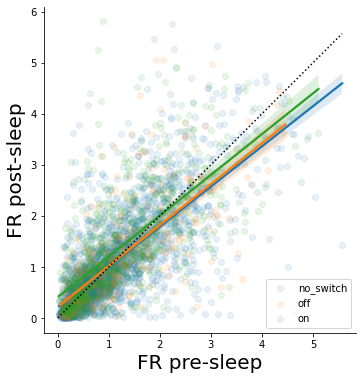

In [410]:
robust = False
fig,ax=plt.subplots(figsize=(6,6))
ax.set_aspect('equal')

data=post_minus_pre_fr_df_all.loc[~outlier]
# data=post_minus_pre_fr_df_all
# for ii,(k,val) in enumerate(post_minus_pre_fr_df_all.groupby('switch_category')): 
for ii,(k,val) in enumerate(data.groupby('switch_category')): 
    sns.regplot(data=val,x='fr_pre',y='fr_post',robust=robust,color=f'C{ii}',label=k,ax=ax,scatter_kws={'alpha':0.1})
bound = np.maximum(data['fr_pre'].max(),data['fr_pre'].max())
ax.plot([0,bound],[0,bound],color='k',linestyle=':')
ax.legend()                                                                            
ax.set(xlabel='FR pre-sleep',ylabel='FR post-sleep')
ax.spines[['top','right']].set_visible(False)
fn = os.path.join(figdir,'fr_post_vs_pre_regplot_outlier_removed.pdf')
# fn = os.path.join(figdir,'fr_post_vs_pre_regplot.pdf')
fig.savefig(fn,bbox_inches='tight')


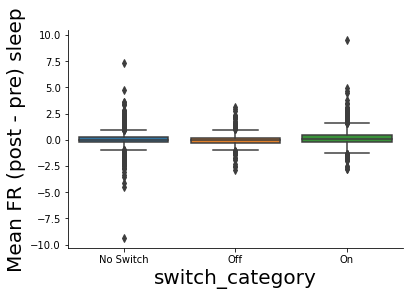

In [350]:
# sns.violinplot(data=post_minus_pre_fr_df_all,x='switch_category',y='post_minus_pre',cut=0)
ax=sns.boxplot(data=post_minus_pre_fr_df_all,x='switch_category',y='post_minus_pre')
ax.set_xticklabels(['No Switch','Off','On'])
ax.set_ylabel('Mean FR (post - pre) sleep')
ax.spines[['top','right']].set_visible(False)
fig=ax.figure
fn = os.path.join(figdir,'fr_post_minus_pre_by_switch_category.pdf')
fig.savefig(fn,bbox_inches='tight')


In [ ]:
scipy.stats.ranksums(post_minus_pre_fr_df_all.query('switch_category=="on"')['post_minus_pre'],
                      post_minus_pre_fr_df_all.query('switch_category=="no_switch"')['post_minus_pre']
                     )

In [ ]:
scipy.stats.ranksums(post_minus_pre_fr_df_all.query('switch_category=="off"')['post_minus_pre'],
                      post_minus_pre_fr_df_all.query('switch_category=="no_switch"')['post_minus_pre']
                     )

In [ ]:
scipy.stats.ranksums(post_minus_pre_fr_df_all.query('switch_category=="off"')['post_minus_pre'],
                      post_minus_pre_fr_df_all.query('switch_category=="on"')['post_minus_pre']
                     )

# test pre post FR differences!

In [313]:
gpb = post_minus_pre_fr_df_all.groupby(level=(0,1))
sw_cat_unique=post_minus_pre_fr_df_all['switch_category'].unique()
n_sw_cat = len(sw_cat_unique)
test_res_all = {}
single_test_res_all = {}
for k,val in gpb:
    test_res_one = {}
    nosw = val.loc[val['switch_category']=='no_switch','post_minus_pre']
    on = val.loc[val['switch_category']=='on','post_minus_pre']
    off = val.loc[val['switch_category']=='off','post_minus_pre']
    
    nosw_minus_on = scipy.stats.ranksums(nosw,on,alternative='less')
    nosw_minus_off = scipy.stats.ranksums(nosw,off,alternative='greater')
    test_res_one = pd.DataFrame([nosw_minus_on,nosw_minus_off],index=['on','off'])
    test_res_all[k] = test_res_one
    
    on_res=scipy.stats.wilcoxon(on,alternative='greater')
    off_res=scipy.stats.wilcoxon(off,alternative='less')
    nosw_res =scipy.stats.wilcoxon(nosw,alternative='two-sided')
    single_test_res_one=pd.DataFrame([on_res,off_res,nosw_res],index=['on','off','no_switch'])
    single_test_res_all[k] = single_test_res_one
test_res_all = pd.concat(test_res_all,axis=0)
single_test_res_all = pd.concat(single_test_res_all,axis=0)
 

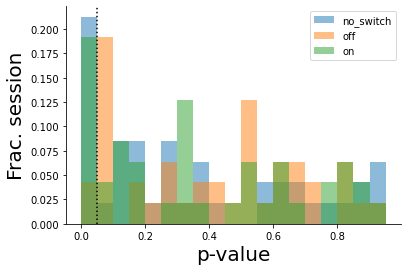

In [351]:
gpb=single_test_res_all.groupby(level=2)
bins = np.arange(0,1,0.05)
fig,ax=plt.subplots()
for k,val in gpb:
    myarray = val['pvalue'].values
    weights=np.ones_like(myarray) / len(myarray)
    ax.hist(myarray,weights=weights,alpha=0.5,label=k,bins=bins)
ax.axvline(0.05,color='k',linestyle=':')
ax.legend()
ax.spines[['top','right']].set_visible(False)
ax.set(xlabel='p-value',ylabel='Frac. session')
fn = os.path.join(figdir,'per_session_post_minus_pre_wilcoxon_pvalue.pdf')
fig.savefig(fn,bbox_inches='tight')

In [381]:
test_res_all.loc[test_res_all['pvalue']<0.05]

statistic    pvalue
e13_16f1 e13_16f1_210302 on   -1.859654  0.031467
         e13_16f1_210322 off   2.005376  0.022461
e13_26m1 e13_26m1_211019 on   -2.907776  0.001820
         e13_26m1_211119 on   -2.333249  0.009818
e14_2m2  e14_2m2_201017  on   -1.904349  0.028432
         e14_2m2_201019  on   -2.334978  0.009772
e14_2m3  e14_2m3_201125  on   -2.498426  0.006237
         e14_2m3_201208  off   2.183581  0.014497
e15_10m1 e15_10m1_200727 off   2.007518  0.022347
e15_13f1 e15_13f1_220118 on   -2.779556  0.002722
         e15_13f1_220119 on   -2.700912  0.003457
         e15_13f1_220120 on   -3.779891  0.000078
e15_9f1  e15_9f1_200720  on   -1.907322  0.028239
         e15_9f1_200723  off   2.187997  0.014335
         e15_9f1_200802  off   1.838290  0.033010
e16_1f1  e16_1f1_200920  on   -2.619561  0.004402
         e16_1f1_201004  on   -1.810150  0.035136
                         off   2.051957  0.020087
e16_3m2  e16_3m2_211210  on   -2.921636  0.001741
         e16_3m2_211212  on   -1.727461  0.042042

/tmp/ipykernel_1582640/3112608100.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  post_minus_pre_fr_df = post_minus_pre_fr_df_all.loc[ani,sess]


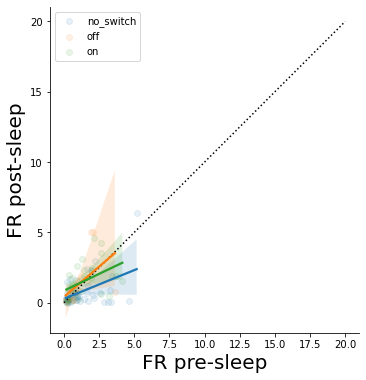

In [388]:
ani,sess = 'e13_26m1','e13_26m1_211119'
post_minus_pre_fr_df = post_minus_pre_fr_df_all.loc[ani,sess]
robust = False
fig,ax=plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
ax.plot([0,20],[0,20],color='k',linestyle=':')
for ii,(k,val) in enumerate(post_minus_pre_fr_df.groupby('switch_category')): 
    sns.regplot(data=val,x='fr_pre',y='fr_post',robust=robust,color=f'C{ii}',label=k,ax=ax,scatter_kws={'alpha':0.1})
ax.legend()                                                                            
ax.set(xlabel='FR pre-sleep',ylabel='FR post-sleep')
ax.spines[['top','right']].set_visible(False)
fn = os.path.join(figdir,f'fr_post_vs_pre_regplot_{sess}.pdf')
fig.savefig(fn,bbox_inches='tight')


# pick some examples

In [192]:
db.loc[['[' in x for x in db['behavior']]].shape

(14, 12)

In [18]:
ani = 'e13_26m1'
sess = 'e13_26m1_211019'#'e13_26m1_210913'
# sess= 'e13_26m1_211116'
ani_list = ['e13_26m1','e15_13f1']
data_dir_full = subdb.loc[subdb['sess_name']==sess]['data_dir_full'][0]

In [8]:
import pf_recombine_central as prc
reload(prc)
pf_params_recombined_test=prc.main(data_dir_full,force_reload=False,dosave=False,load_only=True)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_afterheadscan_recombine.p exists; loading---


In [151]:
fr_map_trial_df = fr_map_trial_df_all.loc[ani,sess]
all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
all_sw_d = all_sw_d_all.loc[ani,sess]
all_sw_with_metrics_d = all_sw_with_metrics_d_all.loc[ani,sess]
trial_index_to_index_within_df = trial_index_to_index_within_df_all[ani,sess]
X_raw = X_raw_all.loc[ani,sess]
X_pwc = X_pwc_all.loc[ani,sess]
changes_df = changes_df_all.loc[ani,sess]
pf_params_recombined = pf_params_recombined_all.loc[ani,sess]

/tmp/ipykernel_126818/4247632614.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df = fr_map_trial_df_all.loc[ani,sess]
/tmp/ipykernel_126818/4247632614.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
/tmp/ipykernel_126818/4247632614.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d = all_sw_d_all.loc[ani,sess]
/tmp/ipykernel_126818/4247632614.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_with_metrics_d = all_sw_with_metrics_d_all.loc[ani,sess]
/tmp/ipykernel_126818/4247632614.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw = X_raw_all.loc[ani,sess]
/tmp/ipykernel_126818/4247632614.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_pwc = X_pwc_all.loc[ani,sess]
/tmp/ipykernel_126818/4247632614.py:8: P

In [165]:
import pf_one_session as pfos

pf_res=pfos.main(data_dir_full,force_reload=False,load_only=True)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_afterheadscan.p exists; loading---


In [174]:
pf_res['all_fields'][1,0].loc[139]

,start,end,com,peak,fr_peak,fr_mean
field_index,,,,,,
0,7,13,8,7,9.324743,5.246142


In [ ]:
combine_pf_res(pf_params,all_fields,beh_df=None,task_l=None,corners_df=None,index_within_to_trial_index_df=None,**kwargs)





In [ ]:
reload(plotfm)

(<Figure size 864x288 with 3 Axes>,
 array([<AxesSubplot:xlabel='Peak firing rate (Hz)', ylabel='Trial'>,
        <AxesSubplot:xlabel='Pos. bin'>], dtype=object))

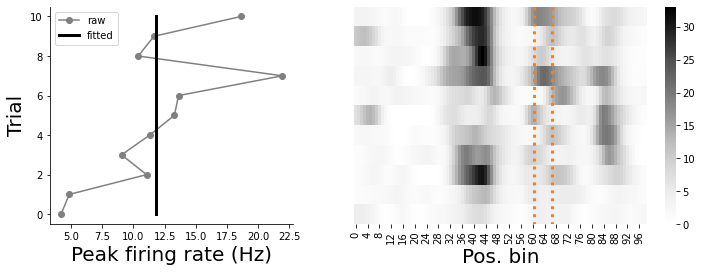

In [129]:
all_fields_row_one = all_fields_recombined.iloc[34]
plotfm.plot_ratemap_fr_one_field(all_fields_row_one,fr_map_trial_df,X_raw,X_pwc,all_sw_d,trial_index_to_index_within_df,
                            save_fig_fn = None,
                            close_fig = False,
                                )

In [149]:
inds= all_sw_with_metrics_d.reset_index(level=0)[['level_0','trialtype','uid','field_index']]
for _,ind in inds.iterrows():
    ind=ind.values
    try:
        all_fields_recombined.loc[ind[0],ind[1],ind[2],ind[3]]
    except:
        print('ind not exist')
        break
        

ind not exist


In [164]:
pf_params_recombined.loc['fr_peak'].loc[1,0,139]

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.016673,0.0,16.020229,15.735195,12.68979,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
all_fields_recombined.loc[1,0,139]

KeyError: (1, 0, 139)

In [ ]:
changes_df.loc[1,0,139].dropna(axis=1)

In [155]:
changes_df.loc[1,0,139].dropna(axis=1)

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0


In [150]:
ind

array([1, 0.0, 139, 0], dtype=object)

In [148]:
all_fields_recombined

start end com peak    fr_peak   fr_mean  \
          field_index                                           
0 0.0 5   0              52  58  55   55   3.597672  3.300532   
      10  0              50  59  54   55   5.363088  4.626846   
      11  0               0   8   3    0   8.570959  8.112577   
          1              29  41  35   36   11.08091  9.471465   
          2              57  63  60   61   6.741123  6.112297   
...                     ...  ..  ..  ...        ...       ...   
1 1.0 206 1              59  77  68   69  11.569471  8.676828   
      207 0               0   6   2    2   3.525752  3.103345   
          1              60  72  66   67   3.898697  3.099231   
          2              89  99  93   92   5.454102  4.130346   
      208 0              34  43  38   39   2.402568  1.641559   

                       other_field_index  
          field_index                     
0 0.0 5   0                          NaN  
      10  0                          NaN  
      11  0                          NaN  
          1                          NaN  
          2                          NaN  
...                                  ...  
1 1.0 206 1                          NaN  
      207 0                          NaN  
          1                          NaN  
          2                          NaN  
      208 0                          NaN  

[694 rows x 7 columns]

In [143]:
all_fields_recombined.loc[0].loc[0].loc[169]

KeyError: 169

In [139]:
all_sw_d_sub

trialtype  uid  field_index          time  speed_gauss  field_pos  \
0 6       both  168            0   7736.053333    22.442811       19.0   
  7       both  169            0   7735.569867    19.532624       14.0   
  12       0.0   62            2   7889.008717    14.006899       86.0   
  15       0.0  148            1   7868.686900     2.584508       55.0   
  18       0.0    5            0   8000.053500     5.562798       58.0   
  23      both   27            0   7985.716533    15.573298       30.0   
  28       1.0   49            0   8198.103633     8.785317       63.0   
  29       1.0   65            1   8214.474433    18.536897       92.0   
  30       1.0  103            1   8197.836900    10.159587       62.0   
  32       0.0  136            0   8221.492900    31.418644       25.0   
  34      both  126            0   8221.326183    28.057974       22.0   
  38       1.0  202            0   8309.381817     7.957458       83.0   
1 0        0.0   30            0  13704.962233    10.941399       24.0   
  3        0.0   72            0  13704.162200     5.001264       26.0   
  9        0.0  140            0  13701.962067     6.120722       29.0   
  13       0.0  193            0  13698.801900     6.300793       35.0   
  23       0.0   96            0  13735.864033    29.352360       19.0   

      trial_index  switch  index_within  switch_trial  ...  \
0 6             4     1.0             2           4.0  ...   
  7             4     1.0             2           4.0  ...   
  12            6     1.0             3           3.0  ...   
  15            6     1.0             3           3.0  ...   
  18            8     1.0             4           4.0  ...   
  23            8     1.0             4           8.0  ...   
  28           11     1.0             4           4.0  ...   
  29           11     1.0             4           4.0  ...   
  30           11     1.0             4           4.0  ...   
  32           12     1.0             7           7.0  ...   
  34           12     1.0             7          12.0  ...   
  38           13     1.0             5           5.0  ...   
1 0             2     1.0             1           1.0  ...   
  3             2     1.0             1           1.0  ...   
  9             2     1.0             1           1.0  ...   
  13            2     1.0             1           1.0  ...   
  23            3     1.0             1           1.0  ...   

      post_ntrial_le_10_perc_frac_total  post_ntrial_le_30_perc_frac_total  \
0 6                                 0.0                           0.047619   
  7                                 0.0                           0.000000   
  12                                0.0                           0.000000   
  15                                0.0                           0.000000   
  18                                0.0                           0.000000   
  23                                0.0                           0.000000   
  28                                0.0                           0.000000   
  29                                0.0                           0.000000   
  30                                0.0                           0.000000   
  32                                0.0                           0.090909   
  34                                0.0                           0.095238   
  38                                0.0                           0.100000   
1 0                                 0.0                           0.200000   
  3                                 0.0                           0.000000   
  9                                 0.0                           0.000000   
  13                                0.2                           0.200000   
  23                                0.0                           0.400000   

      post_ntrial_le_50_perc_frac_total  post_ntrial_le_70_perc_frac_total  \
0 6                            0.285714                           0.5238

In [136]:
all_sw_d = all_sw_with_metrics_d
ma_d = {'on':(all_sw_d['post_ntrial_ge_50_perc_frac_segment'] >= 0.5) & (all_sw_d['switch'] ==1) & (all_sw_d['pre_ntrial_le_30_perc_frac_segment'] >= 0.5) ,
            'off':(all_sw_d['pre_ntrial_ge_50_perc_frac_segment'] >= 0.5) & (all_sw_d['switch'] ==-1) & (all_sw_d['post_ntrial_le_30_perc_frac_segment'] >= 0.5),
            }

save_dir = misc.get_or_create_subdir(data_dir_full,'py_figures','fr_map_x_pwc')
for k,ma in ma_d.items():
    save_dir_good = os.path.join(save_dir,f'good_{k}')
    ma = ma & (all_sw_d['field_pos']>=10) & (all_sw_d['field_pos']<=92)
    ma =ma & (all_sw_d['post_ntrials_in_segment']>=4)
    all_sw_d_sub = all_sw_d.loc[ma]
    if all_sw_d_sub.shape[0]>0:
        inds=all_sw_d.reset_index(level=0)[['level_0','trialtype','uid','field_index']] # level_0 is task
        inds=pd.MultiIndex.from_frame(inds)
        all_fields_recombined_sub = all_fields_recombined.loc[inds]
        plot_ratemap_fr_all_fields(fr_map_trial_df,all_fields_recombined_sub,all_sw_d,trial_index_to_index_within_df,X_raw,X_pwc,
                            save_dir=save_dir_good,save_fn_func=plotfm.save_fn_func)

KeyError: '[(1, 0.0, 139, 0), (1, 0.0, 140, 0), (1, 0.0, 140, 1), (1, 0.0, 149, 0), (1, 0.0, 193, 0), (1, 0.0, 208, 1), (1, 1.0, 58, 0), (1, 1.0, 75, 1), (1, 1.0, 133, 0), (1, 1.0, 194, 1), (1, 0.0, 135, 0), (1, 1.0, 54, 0), (1, 1.0, 90, 0), (1, 1.0, 131, 0), (1, 1.0, 188, 0)] not in index'

In [106]:
reload(plotfm)
plotfm.plot_ratemap_fr_all_fields(fr_map_trial_df,all_fields_recombined.iloc[:1],all_sw_d,trial_index_to_index_within_df,X_raw,X_pwc,
                                save_dir='',save_fn_func=lambda a,b,c,d:'test.svg')



test.svg saved!


In [21]:
fr_map_trial_df = fr_map_trial_df_all.loc[ani,sess]
all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
all_sw_d = all_sw_d_all.loc[ani,sess]
trial_index_to_index_within_df = trial_index_to_index_within_df_all[ani,sess]
X_raw = X_raw_all.loc[ani,sess]
X_pwc = X_pwc_all.loc[ani,sess]

plotfm.plot_ratemap_fr_all_fields(fr_map_trial_df,all_fields_recombined,all_sw_d,trial_index_to_index_within_df,X_raw,X_pwc,
                                save_dir='',save_fn_func=lambda a,b,c,d:'test.svg')


/tmp/ipykernel_126818/601368179.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df = fr_map_trial_df_all.loc[ani,sess]
/tmp/ipykernel_126818/601368179.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
/tmp/ipykernel_126818/601368179.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_d = all_sw_d_all.loc[ani,sess]
/tmp/ipykernel_126818/601368179.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw = X_raw_all.loc[ani,sess]
/tmp/ipykernel_126818/601368179.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_pwc = X_pwc_all.loc[ani,sess]


> /mnt/home/szheng/projects/place_variability/code/plot_all_fr_map_x_pwc_one_session.py(88)plot_ratemap_fr_all_fields()
     86             tt_ratemap=tt
     87             pdb.set_trace()
---> 88             sw_index_within = all_sw_d_sub['switch_trial']
     89         fr_map_trial_one = fr_map_trial_df.loc[task,tt_ratemap,uid].dropna(axis=1,how='all').T
     90 

ipdb> c
test.svg saved!
> /mnt/home/szheng/projects/place_variability/code/plot_all_fr_map_x_pwc_one_session.py(87)plot_ratemap_fr_all_fields()
     85         else:
     86             tt_ratemap=tt
---> 87             pdb.set_trace()
     88             sw_index_within = all_sw_d_sub['switch_trial']
     89         fr_map_trial_one = fr_map_trial_df.loc[task,tt_ratemap,uid].dropna(axis=1,how='all').T

ipdb> c
test.svg saved!
> /mnt/home/szheng/projects/place_variability/code/plot_all_fr_map_x_pwc_one_session.py(88)plot_ratemap_fr_all_fields()
     86             tt_ratemap=tt
     87             pdb.set_trace()
---> 88  

ipdb> exit


BdbQuit: 

In [7]:
from matplotlib.ticker import MaxNLocator

In [10]:
def plot_ratemap_fr(fr_map_trial_df,all_fields_recombined,X_raw,X_pwc,
                    trial_index_to_index_within_df,task,tt,uid,field_id
                   ):
    if tt=='both':
        ma=trial_index_to_index_within_df.loc[task].index.get_level_values(1)==row['switch_trial']
        tt_ratemap = trial_index_to_index_within_df.loc[task].loc[ma].index[0][0]
        sw_index_within = trial_index_to_index_within_df.loc[task].loc[ma].values[0]
    else:
        tt_ratemap=tt
        sw_index_within = row['switch_trial']
    fr_map_trial_one = fr_map_trial_df.loc[task,tt_ratemap,uid].dropna(axis=1,how='all').T
    
    index_within_left = trial_index_to_index_within_df.loc[task,tt_ratemap].values
    fr_map_trial_one = fr_map_trial_one.loc[index_within_left]
    
    field_bound=all_fields_recombined.loc[task,tt,uid,field_id][['start','end']]

    fig,axs=plt.subplots(1,2,figsize=(6*2,4),gridspec_kw={'width_ratios': [1,1.5]})
    
    
    
    columns_one_tt = X_pwc.loc[task,tt_ratemap].dropna(axis=1,how='all').columns
    toplot=dict(raw=X_raw.loc[task,tt,uid,field_id][columns_one_tt].values,
    fitted = X_pwc.loc[task,tt,uid,field_id][columns_one_tt].values)
    
    ax = axs[0]
    for k,val in toplot.items():
        trials = np.arange(len(val))
        if k=='raw':
            ax.plot(val,trials,label=k,marker='o')
        else:
            ax.plot(val,trials,label=k)
        
#     ax.invert_yaxis()
    ax.yaxis.set_major_locator(MaxNLocator(10,integer=True))
    ax.legend()
    ax.spines[['top','right']].set_visible(False)
    
    ax=axs[1]
    ph.ratemap_one_raw(fr_map_trial_one,trial=sw_index_within,field_bound=field_bound,fig=fig,ax=ax,line_kws={},title=None,heatmap_kws={})
    ax.set_yticks([])
    ax.invert_yaxis()
    
    return fig,axs
    
    

In [33]:
all_sw_with_metrics_d.loc['e15_13f1_220117']

trialtype  uid  field_index         time  speed_gauss  field_pos  \
0 0        both   66            0  6684.468867    27.401026       25.0   
  1        both   67            0  6683.535300    30.506287        8.0   
  2        both  186            0  6684.402200    30.468344       24.0   
  3        both  329            0  6684.035433    40.542415       17.0   
  4        both  349            0  6684.035433    40.542415       17.0   
...         ...  ...          ...          ...          ...        ...   
  201       0.0  181            1  8222.942500    11.502441       43.0   
  202       0.0  204            0  8220.241800     8.558946       35.0   
  203       0.0  250            0  8242.805858    19.295595       83.0   
  204       0.0  313            1  8234.245367    15.980170       56.0   
  205       0.0  357            1  8223.709333    11.951551       49.0   

       trial_index  switch  index_within  switch_trial  ...  \
0 0              2     1.0             1           2.0  ...   
  1              2     1.0             1           2.0  ...   
  2              2     1.0             1           2.0  ...   
  3              2     1.0             1           2.0  ...   
  4              2     1.0             1           2.0  ...   
...            ...     ...           ...           ...  ...   
  201           30     1.0            18          18.0  ...   
  202           30     1.0            18          18.0  ...   
  203           30     1.0            18          18.0  ...   
  204           30     1.0            18          18.0  ...   
  205           30    -1.0            18          18.0  ...   

       post_ntrial_le_10_perc_frac_total  post_ntrial_le_30_perc_frac_total  \
0 0                                  0.0                            0.03125   
  1                                  0.0                            0.00000   
  2                                  0.0                            0.00000   
  3                                  0.0                            0.00000   
  4                                  0.0                            0.00000   
...                                  ...                                ...   
  201                                0.0                            0.00000   
  202                                0.0                            0.00000   
  203                                0.0                            0.00000   
  204                                0.0                            0.00000   
  205                                0.0                            0.10000   

       post_ntrial_le_50_perc_frac_total  post_ntrial_le_70_perc_frac_total  \
0 0                              0.46875                            0.75000   
  1                              0.03125                            0.28125   
  2                              0.03125                            0.12500   
  3                              0.00000                            0.03125   
  4                              0.06250                            0.09375   
...                                  ...                                ...   
  201                            0.00000                            0.05000   
  202                            0.00000                            0.00000   
  203                            0.05000                            0.05000   
  204                            0.00000                            0.00000   
  205                            0.10000                            0.10000   

       post_ntrial_le_90_perc_frac_total  post_ntrial_ge_10_perc_frac_total  \
0 0                               0.8750                            0.93750   
  1                               0.6250                            0.71875   
  2                               0.1875                            0.21875   
  3                               0.1250                            0.21875   
  4                               0.2500                           

In [30]:
all_fields_recombined

start end com peak    fr_peak   fr_mean  \
           field_index                                           
0 0.0  31  1              66  81  73   75   8.654095  6.579647   
       32  1              42  49  45   45   6.259728  4.458995   
       34  0              47  55  50   50   4.316938   3.87356   
       35  1              48  52  49   50   3.301376  3.221881   
       36  0              49  62  55   55   6.541953  4.731811   
...                      ...  ..  ..  ...        ...       ...   
  both 363 0              11  29  18   16   4.996368  2.918468   
       368 0               3  10   6    7   4.144261   3.38993   
       370 0               0   7   3    0   1.599564  1.277626   
       374 0               2  16   9   10  13.154764  6.930665   
       376 0               0  10   3    3   5.103874  3.720668   

                        other_field_index  
           field_index                     
0 0.0  31  1                          NaN  
       32  1                          NaN  
       34  0                          NaN  
       35  1                          NaN  
       36  0                          NaN  
...                                   ...  
  both 363 0                          0.0  
       368 0                          0.0  
       370 0                          0.0  
       374 0                          0.0  
       376 0                          0.0  

[682 rows x 7 columns]

In [29]:
fr_map_trial_df

0          1         2          3          4         5   \
0 0.0 31.0  0   0.0  11.168066  1.281103  10.008830  10.781708  2.246049   
            1   0.0  11.418373  1.331767   7.588289  10.464001  2.802722   
            2   0.0  11.949046  1.461074   5.069925   9.858758  3.566071   
            3   0.0  12.741641  1.718925   3.422043   9.054236  4.226390   
            4   0.0  13.695591  2.182831   2.532352   8.175274  4.680527   
...             ...        ...       ...        ...        ...       ...   
  1.0 376.0 94  0.0   1.549852  0.000000   0.000000   0.000000  0.915124   
            95  0.0   1.639326  0.000000   0.000000   0.000000  0.954067   
            96  0.0   1.580323  0.000000   0.000000   0.000000  1.004105   
            97  0.0   1.490899  0.000000   0.000000   0.000000  1.059364   
            98  0.0   1.435862  0.000000   0.000000   0.000000  1.097114   

                      6         7         8         9   ...  27  28  29  30  \
0 0.0 31.0  0   4.416102  1.657582  5.837388  2.184432  ... NaN NaN NaN NaN   
            1   4.459708  2.058859  6.336582  2.135892  ... NaN NaN NaN NaN   
            2   4.486821  2.825028  6.977152  2.083302  ... NaN NaN NaN NaN   
            3   4.465095  3.953835  7.326204  2.098987  ... NaN NaN NaN NaN   
            4   4.431899  5.507286  7.222798  2.278987  ... NaN NaN NaN NaN   
...                  ...       ...       ...       ...  ...  ..  ..  ..  ..   
  1.0 376.0 94  1.039991  0.860552  0.000000  0.000000  ... NaN NaN NaN NaN   
            95  1.341690  1.459928  0.000000  0.000000  ... NaN NaN NaN NaN   
            96  1.563750  2.194473  0.000000  0.000000  ... NaN NaN NaN NaN   
            97  1.707319  2.889867  0.000000  0.000000  ... NaN NaN NaN NaN   
            98  1.777704  3.317203  0.000000  0.000000  ... NaN NaN NaN NaN   

                31  32  33  34  35  36  
0 0.0 31.0  0  NaN NaN NaN NaN NaN NaN  
            1  NaN NaN NaN NaN NaN NaN  
            2  NaN NaN NaN NaN NaN NaN  
            3  NaN NaN NaN NaN NaN NaN  
            4  NaN NaN NaN NaN NaN NaN  
...             ..  ..  ..  ..  ..  ..  
  1.0 376.0 94 NaN NaN NaN NaN NaN NaN  
            95 NaN NaN NaN NaN NaN NaN  
            96 NaN NaN NaN NaN NaN NaN  
            97 NaN NaN NaN NaN NaN NaN  
            98 NaN NaN NaN NaN NaN NaN  

[65934 rows x 37 columns]

In [49]:
fr_map_trial_df.loc[0,0,31]

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.000000,11.168066,1.281103,10.008830,10.781708,2.246049,4.416102,1.657582,5.837388,2.184432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,11.418373,1.331767,7.588289,10.464001,2.802722,4.459708,2.058859,6.336582,2.135892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,11.949046,1.461074,5.069925,9.858758,3.566071,4.486821,2.825028,6.977152,2.083302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,12.741641,1.718925,3.422043,9.054236,4.226390,4.465095,3.953835,7.326204,2.098987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,13.695591,2.182831,2.532352,8.175274,4.680527,4.431899,5.507286,7.222798,2.278987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2.771930,2.013750,3.861519,4.141731,4.322543,3.357976,4.245254,0.000887,6.807920,1.434808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2.465858,2.452607,3.988347,3.877562,4.684073,5.683335,4.491397,0.000000,7.570790,2.248994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1.952009,2.818907,3.883810,3.502233,4.778798,7.958159,4.692713,0.000000,7.445368,3.039951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1.437650,3.050019,3.742965,3.146148,4.694861,9.545800,4.839173,0.000000,6.835787,3.633445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(<Figure size 640x480 with 2 Axes>, <AxesSubplot:>)

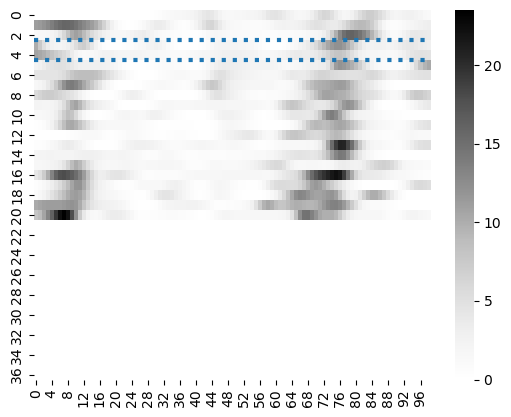

In [51]:
reload(ph)
ph.ratemap_one_raw(fr_map_trial_df.loc[0,0,31].T,trial=[3,5],field_bound=None,fig=None,ax=None,line_kws={},title=None,heatmap_kws={})



In [42]:
[x in [1,2] for x in trial_index_to_index_within_df.loc[0].index.get_level_values(1) ]

[False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [37]:
ma = (all_sw_d['trialtype']==tt) & (all_sw_d['uid']==uid) & (all_sw_d['uid']==field_id) 
all_sw_d_sub = all_sw_d.loc[ma]

/tmp/ipykernel_1054322/3399868835.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_with_metrics_d_all.loc[ani,sess]


trialtype  uid  field_index         time  speed_gauss  field_pos  \
0 0        both   66            0  6684.468867    27.401026       25.0   
  1        both   67            0  6683.535300    30.506287        8.0   
  2        both  186            0  6684.402200    30.468344       24.0   
  3        both  329            0  6684.035433    40.542415       17.0   
  4        both  349            0  6684.035433    40.542415       17.0   
...         ...  ...          ...          ...          ...        ...   
  201       0.0  181            1  8222.942500    11.502441       43.0   
  202       0.0  204            0  8220.241800     8.558946       35.0   
  203       0.0  250            0  8242.805858    19.295595       83.0   
  204       0.0  313            1  8234.245367    15.980170       56.0   
  205       0.0  357            1  8223.709333    11.951551       49.0   

       trial_index  switch  index_within  switch_trial  ...  \
0 0              2     1.0             1           2.0  ...   
  1              2     1.0             1           2.0  ...   
  2              2     1.0             1           2.0  ...   
  3              2     1.0             1           2.0  ...   
  4              2     1.0             1           2.0  ...   
...            ...     ...           ...           ...  ...   
  201           30     1.0            18          18.0  ...   
  202           30     1.0            18          18.0  ...   
  203           30     1.0            18          18.0  ...   
  204           30     1.0            18          18.0  ...   
  205           30    -1.0            18          18.0  ...   

       post_ntrial_le_10_perc_frac_total  post_ntrial_le_30_perc_frac_total  \
0 0                                  0.0                            0.03125   
  1                                  0.0                            0.00000   
  2                                  0.0                            0.00000   
  3                                  0.0                            0.00000   
  4                                  0.0                            0.00000   
...                                  ...                                ...   
  201                                0.0                            0.00000   
  202                                0.0                            0.00000   
  203                                0.0                            0.00000   
  204                                0.0                            0.00000   
  205                                0.0                            0.10000   

       post_ntrial_le_50_perc_frac_total  post_ntrial_le_70_perc_frac_total  \
0 0                              0.46875                            0.75000   
  1                              0.03125                            0.28125   
  2                              0.03125                            0.12500   
  3                              0.00000                            0.03125   
  4                              0.06250                            0.09375   
...                                  ...                                ...   
  201                            0.00000                            0.05000   
  202                            0.00000                            0.00000   
  203                            0.05000                            0.05000   
  204                            0.00000                            0.00000   
  205                            0.10000                            0.10000   

       post_ntrial_le_90_perc_frac_total  post_ntrial_ge_10_perc_frac_total  \
0 0                               0.8750                            0.93750   
  1                               0.6250                            0.71875   
  2                               0.1875                            0.21875   
  3                               0.1250                            0.21875   
  4                               0.2500                           

In [108]:
all_fields_recombined

start end com peak    fr_peak    fr_mean  \
           field_index                                            
0 0.0  3   0              24  40  32   32   2.327171   1.246869   
       27  0               0  30  15   15  27.438358  21.794745   
       29  0               2   9   5    6   5.685168   5.262314   
           1              20  38  29   30   22.52481  14.049665   
           2              69  85  77   78  13.938965   9.956611   
...                      ...  ..  ..  ...        ...        ...   
  both 379 0               2  16   9   11    7.54483   5.659744   
       385 0               2  16   9   12   5.571619   3.880941   
       387 0               0  22  13   15    7.04149    3.25166   
       443 0               5  23  15   16  13.264791   7.015054   
       448 0               9  27  18   19  10.979548   6.360062   

                        other_field_index  
           field_index                     
0 0.0  3   0                          NaN  
       27  0                          NaN  
       29  0                          NaN  
           1                          NaN  
           2                          NaN  
...                                   ...  
  both 379 0                          0.0  
       385 0                          0.0  
       387 0                          0.0  
       443 0                          0.0  
       448 0                          0.0  

[820 rows x 7 columns]

In [113]:
ma=all_sw_d.reset_index(level=0)[['level_0','trialtype','uid','field_index']]

In [117]:
ma=pd.MultiIndex.from_frame(ma)

In [118]:
all_fields_recombined.loc[ma]

start end com peak    fr_peak    fr_mean  \
           field_index                                            
0 1.0  38  1              95  99  97   97   1.182431    1.14498   
       99  1              65  82  73   74   9.940441   7.060993   
       111 0              50  56  53   53   5.455826   5.302636   
       125 1              73  83  78   79   4.013709   3.403999   
       150 1              68  85  77   78   8.742121   4.970512   
...                      ...  ..  ..  ...        ...        ...   
       236 0              47  54  50   51  11.841742  10.369053   
       409 0              48  53  50   50   2.128566   1.957106   
       448 1              67  84  75   75   5.698708   4.228296   
  both 35  0               0   5   2    1   5.357562   5.205444   
       258 0               3  25  14   16   13.20629   8.187948   

                        other_field_index  
           field_index                     
0 1.0  38  1                          NaN  
       99  1                          NaN  
       111 0                          NaN  
       125 1                          NaN  
       150 1                          NaN  
...                                   ...  
       236 0                          NaN  
       409 0                          NaN  
       448 1                          NaN  
  both 35  0                          0.0  
       258 0                          0.0  

[436 rows x 7 columns]

/tmp/ipykernel_1054322/3978661800.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df = fr_map_trial_df_all.loc[ani,sess]
/tmp/ipykernel_1054322/3978661800.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
/tmp/ipykernel_1054322/3978661800.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw = X_raw_all.loc[ani,sess]
/tmp/ipykernel_1054322/3978661800.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_pwc = X_pwc_all.loc[ani,sess]
/tmp/ipykernel_1054322/3978661800.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial_df = fr_map_trial_df_all.loc[ani,sess]
/tmp/ipykernel_1054322/3978661800.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
/tmp/ipykernel

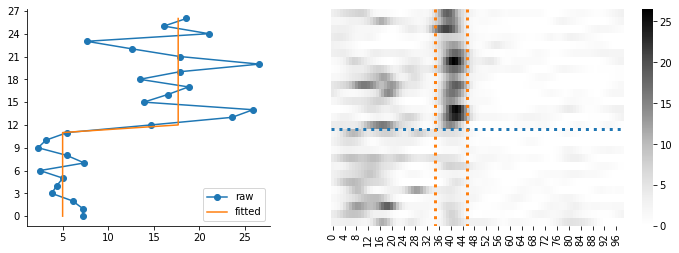

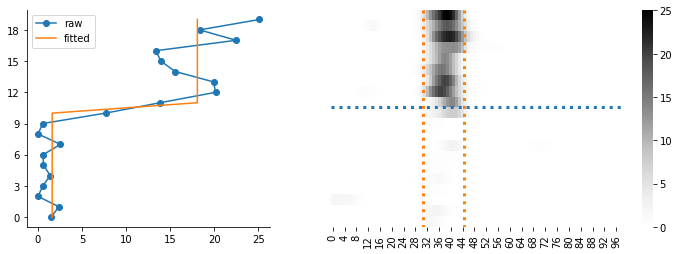

In [24]:
for ani in ani_list:
    all_sw_with_metrics_d = all_sw_with_metrics_d_all.loc[ani].loc[(slice(None),0),:]
    ma = (all_sw_with_metrics_d['post_ntrial_ge_50_perc_frac_segment'] > 0.8) & (all_sw_with_metrics_d['switch'] ==1) & (all_sw_with_metrics_d['pre_ntrial_le_30_perc_frac_segment'] > 0.8) 
    ma = ma & (all_sw_with_metrics_d['field_pos']>=10) & (all_sw_with_metrics_d['field_pos']<=45)
    ma =ma & (all_sw_with_metrics_d['post_ntrials_in_segment']>=5)
    row=all_sw_with_metrics_d.loc[ma].sample(1).iloc[0]
    sess,task = row.name[:2]
    tt,uid,field_id = row[['trialtype','uid','field_index']]
    
    fr_map_trial_df = fr_map_trial_df_all.loc[ani,sess]
    all_fields_recombined = all_fields_recombined_all.loc[ani,sess]
    X_raw = X_raw_all.loc[ani,sess]
    X_pwc = X_pwc_all.loc[ani,sess]
    trial_index_to_index_within_df = trial_index_to_index_within_df_all[ani,sess]
    
    
    fig,axs = plot_ratemap_fr(fr_map_trial_df,all_fields_recombined,X_raw,X_pwc,
                    trial_index_to_index_within_df,task,tt,uid,field_id
                   )
    

In [182]:
pval=pval_all.loc[ani,sess].dropna(axis=1)
pval.columns=pd.MultiIndex.from_tuples(pval.columns)
pval

/tmp/ipykernel_874560/2915306917.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  pval=pval_all.loc[ani,sess].dropna(axis=1)


1                                                           \
               pval exp_var_ratio exp_var_ratio_sh_med exp_var_ratio_sh_high   
0 0.0  45  0  0.471      0.161739             0.154341              0.465884   
           1  0.138      0.271926             0.164934              0.387159   
           2  0.050      0.412014             0.149696              0.448775   
       46  0  0.487      0.156238             0.152216              0.481266   
           1  0.586      0.136464             0.156814              0.400154   
...             ...           ...                  ...                   ...   
1 both 335 0  0.481      0.103713             0.100657              0.325582   
       336 0  0.512      0.096854             0.099499              0.269538   
       337 0  0.097      0.204152             0.107727              0.266069   
       340 1  0.000      0.512208             0.098211              0.309237   
       341 1  0.474      0.106249             0.101323              0.284999   

                                       2                                     \
             exp_var_ratio_sh_low   pval exp_var_ratio exp_var_ratio_sh_med   
0 0.0  45  0             0.045630  0.489      0.317761             0.315572   
           1             0.042736  0.196      0.418086             0.320562   
           2             0.049386  0.003      0.622493             0.359147   
       46  0             0.049220  0.036      0.622073             0.319266   
           1             0.042117  0.730      0.257929             0.324391   
...                           ...    ...           ...                  ...   
1 both 335 0             0.037227  0.734      0.205598             0.265876   
       336 0             0.030235  0.667      0.205456             0.237561   
       337 0             0.033703  0.085      0.341910             0.230271   
       340 1             0.034759  0.000      0.639520             0.243125   
       341 1             0.032434  0.405      0.244419             0.227352   

                                                         
             exp_var_ratio_sh_high exp_var_ratio_sh_low  
0 0.0  45  0              0.650692             0.154832  
           1              0.559082             0.169737  
           2              0.585245             0.147074  
       46  0              0.630339             0.156011  
           1              0.578276             0.161860  
...                            ...                  ...  
1 both 335 0              0.578267             0.133700  
       336 0              0.432253             0.115940  
       337 0              0.405159             0.123969  
       340 1              0.459990             0.116421  
       341 1              0.399064             0.121345  

[1132 rows x 10 columns]

In [190]:
import test_change_point as tcp
reload(tcp)
best_n = pval.apply(tcp.get_n_cpd,axis=1)


In [192]:
best_n.loc[task,tt,uid,field_id]

2

In [188]:
best_n.loc[task,tt,uid]

0    0
dtype: int64

In [168]:
pval_all.loc[ani,sess].dropna(axis=1).loc[task,tt].loc[uid,field_id]

/tmp/ipykernel_874560/1857451225.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  pval_all.loc[ani,sess].dropna(axis=1).loc[task,tt].loc[uid,field_id]


(1, pval)                     0.241000
(1, exp_var_ratio)            0.406642
(1, exp_var_ratio_sh_med)     0.251165
(1, exp_var_ratio_sh_high)    0.474719
(1, exp_var_ratio_sh_low)     0.085896
(2, pval)                     0.022000
(2, exp_var_ratio)            0.688270
(2, exp_var_ratio_sh_med)     0.475779
(2, exp_var_ratio_sh_high)    0.681479
(2, exp_var_ratio_sh_low)     0.135558
Name: (90, 0), dtype: float64

In [174]:
best_n_all.loc[ani,sess].loc[task,tt,uid]

/tmp/ipykernel_874560/680190489.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  best_n_all.loc[ani,sess].loc[task,tt,uid]


0    0
dtype: int64

In [38]:
fr_map_trial_one.loc[:,20:30].max(axis=1)

0      0.192891
1      0.100182
2      0.660969
3      0.188426
4      0.000000
5      1.839090
6      8.555727
7      8.102276
8      7.197430
9     12.461025
10    14.085268
11     8.669870
12    11.653109
13     0.088370
14     1.934475
15     1.307275
16     4.163435
17     2.539796
18     1.134786
19     1.826966
20    13.963999
21     6.800021
22     0.001120
23     3.686865
24     0.002965
25     2.028079
26     2.415417
dtype: float64

In [ ]:

if tt=='both':
    tt_ratemap=0
else:
    tt_ratemap=tt
fr_map_trial_one = fr_map_trial_df.loc[task,tt_ratemap,uid].dropna(axis=1,how='all').T
field_bound=all_fields_recombined.loc[task,tt,uid,field_id][['start','end']]

fig,axs=plt.subplots(1,2,figsize=(6*2,4))
sw_res['X_raw'].loc[task,tt,uid,field_id].dropna().plot(ax=axs[0])
sw_res['X_pwc'].loc[task,tt,uid,field_id].dropna().plot(ax=axs[0])

ph.ratemap_one_raw(fr_map_trial_one,trial=None,field_bound=field_bound,fig=fig,ax=axs[1],line_kws={},title=None,heatmap_kws={})

In [15]:
row

,,,trialtype,uid,field_index,time,speed_gauss,field_pos,trial_index,switch,index_within,switch_trial,...,post_ntrial_le_10_perc_frac_total,post_ntrial_le_30_perc_frac_total,post_ntrial_le_50_perc_frac_total,post_ntrial_le_70_perc_frac_total,post_ntrial_le_90_perc_frac_total,post_ntrial_ge_10_perc_frac_total,post_ntrial_ge_30_perc_frac_total,post_ntrial_ge_50_perc_frac_total,post_ntrial_ge_70_perc_frac_total,post_ntrial_ge_90_perc_frac_total
e15_13f1_220119,0,83,1.0,293,1,7755.457833,11.158259,43.0,13,1.0,5,5.0,...,0.0,0.0,0.0,0.1,0.4,0.5,0.5,0.5,0.4,0.1


# debugging plotfm

In [11]:
data_dir_full = subdb.iloc[0]['data_dir_full']
plot_ratemap_fr_all_fields =plotfm.plot_ratemap_fr_all_fields
data=plotfm.load_preprocess_data(data_dir_full)
trial_index_to_index_within_df = data['trial_index_to_index_within_df']
fr_map_trial_df = data['fr_map_trial_df']
all_fields_recombined =data['all_fields_recombined']
X_pwc = data['X_pwc']
X_raw = data['X_raw']
all_sw_d = data['all_sw_with_metrics_d']
ma_d = {'on':(all_sw_d['post_ntrial_ge_50_perc_frac_segment'] >= 0.5) & (all_sw_d['switch'] ==1) & (all_sw_d['pre_ntrial_le_30_perc_frac_segment'] >= 0.5) ,
                'off':(all_sw_d['pre_ntrial_ge_50_perc_frac_segment'] >= 0.5) & (all_sw_d['switch'] ==-1) & (all_sw_d['post_ntrial_le_30_perc_frac_segment'] >= 0.5),
                }
save_dir = 'test'
for k,ma in ma_d.items():
    save_dir_good = misc.get_or_create_subdir(save_dir,f'good_{k}')
    ma = ma & (all_sw_d['field_pos']>=10) & (all_sw_d['field_pos']<=92)
    ma =ma & (all_sw_d['post_ntrials_in_segment']>=4)
    all_sw_d_sub = all_sw_d.loc[ma]
    print(all_sw_d_sub.head(5))

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info.p exists; loading---
     trialtype  uid  field_index         time  speed_gauss  field_pos  \
0 4        1.0  150            1  7982.441933    23.947267       75.0   
  14      both   93            0  7966.087800    39.251334       13.0   
  19       1.0  285            0  7993.228000    22.751459       41.0   
  25       0.0  126            0  8013.549800    39.696302       24.0   
  32       0.0  456            0  8014.099933    19.884963       34.0   

      trial_index  switch  index_within  switch_trial  ...  \
0 4             4     1.0      

In [15]:
reload(misc)

<module 'misc' from '/mnt/home/szheng/projects/util_code/misc.py'>

In [19]:
reload(plotfm)

<module 'plot_all_fr_map_x_pwc_one_session' from '/mnt/home/szheng/projects/place_variability/code/plot_all_fr_map_x_pwc_one_session.py'>

In [20]:
plot_ratemap_fr_all_fields =plotfm.plot_ratemap_fr_all_fields
data=plotfm.load_preprocess_data(data_dir_full)
trial_index_to_index_within_df = data['trial_index_to_index_within_df']
fr_map_trial_df = data['fr_map_trial_df']
all_fields_recombined =data['all_fields_recombined']
X_pwc = data['X_pwc']
X_raw = data['X_raw']
all_sw_d = data['all_sw_with_metrics_d']
ma_d = {'on':(all_sw_d['post_ntrial_ge_50_perc_frac_segment'] >= 0.5) & (all_sw_d['switch'] ==1) & (all_sw_d['pre_ntrial_le_30_perc_frac_segment'] >= 0.5) ,
                'off':(all_sw_d['pre_ntrial_ge_50_perc_frac_segment'] >= 0.5) & (all_sw_d['switch'] ==-1) & (all_sw_d['post_ntrial_le_30_perc_frac_segment'] >= 0.5),
                }
save_dir = save_dir = misc.get_or_create_subdir(data_dir_full,'py_figures','fr_map_x_pwc')
for k,ma in ma_d.items():
    save_dir_good = misc.get_or_create_subdir(save_dir,f'good_{k}')
    ma = ma & (all_sw_d['field_pos']>=10) & (all_sw_d['field_pos']<=92)
    ma =ma & (all_sw_d['post_ntrials_in_segment']>=4)
    all_sw_d_sub = all_sw_d.loc[ma]
    pdb.set_trace()
    if all_sw_d_sub.shape[0]>0:
        inds=all_sw_d.reset_index(level=0)[['level_0','trialtype','uid','field_index']] # level_0 is task
        inds=pd.MultiIndex.from_frame(inds)
        all_fields_recombined_sub = all_fields_recombined.loc[inds]
        plot_ratemap_fr_all_fields(fr_map_trial_df,all_fields_recombined_sub,all_sw_d,trial_index_to_index_within_df,X_raw,X_pwc,
                            save_dir=save_dir_good,save_fn_func=plotfm.save_fn_func)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on made!
> /tmp/ipykernel_384688/2714167821.py(19)<cell line: 13>()
     17     all_sw_d_sub = all_sw_d.loc[ma]
     18     pdb.set_trace()
---> 19     if all_sw_d_sub.shape[0]>0:
     20         inds=all_sw_d.reset_index(level=0)[['level_0','trialtype','uid','field_index']] # level_0 is task
     21         inds=pd.MultiIndex.from_frame(inds)

ipdb> c
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid171_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid178_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid196_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid200_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid206_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid210_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid211_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid214_1.svg saved!
/mnt/home/szheng

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid414_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid455_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid43_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid87_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid101_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid110_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid112_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid173_1.svg saved!
/mnt/home/szheng/c

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid256_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid448_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_both_uid301_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid134_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid145_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid202_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid295_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid37_0.svg saved!
/mnt/home/szheng

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid459_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_both_uid157_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid3_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid84_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid123_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid334_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid57_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid133_0.svg saved!
/mnt/home/szheng/ce

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid36_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid205_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid213_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_both_uid82_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_both_uid261_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid35_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid206_3.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid223_1.svg saved!
/mnt/home/szheng/

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid351_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid386_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid389_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_0.0_uid479_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_both_uid54_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid103_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid121_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_on/0_1.0_uid276_1.svg saved!
/mnt/home/szheng

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid265_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid274_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid381_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid451_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid455_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_both_uid93_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid97_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid116_2.svg saved!
/mnt/home

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid246_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid252_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid287_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid374_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid383_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid408_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_both_uid35_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_both_uid99_0.svg saved!
/mnt/hom

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid336_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid352_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid386_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid476_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid120_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid196_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid411_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid442_0.svg saved!
/mnt/hom

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid96_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid266_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_both_uid443_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid93_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid110_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid145_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid162_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid312_1.svg saved!
/mnt/home

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid392_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid436_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid454_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid39_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid133_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid155_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid174_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid206_0.svg saved!
/mnt/home

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid191_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid208_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid240_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid259_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid387_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid116_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid143_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid163_0.svg saved!
/mnt/hom

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_both_uid150_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid58_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid88_2.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid202_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_0.0_uid389_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid3_0.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid256_1.svg saved!
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_figures/fr_map_x_pwc/good_off/0_1.0_uid38_0.svg saved!
/mnt/home/sz

In [25]:
all_fields_recombined.loc[0,'both']

,,start,end,com,peak,fr_peak,fr_mean,other_field_index
,field_index,,,,,,,
35,0,0,5,2,1,5.357562,5.205444,0.0
48,0,2,16,9,10,20.56967,17.298336,0.0
54,0,12,17,14,14,5.27992,4.92034,0.0
56,0,2,23,13,16,8.914095,5.809549,0.0
59,0,2,23,13,15,4.43219,2.887268,0.0
82,0,19,24,21,22,7.629908,7.19501,0.0
88,0,12,30,21,22,27.318968,17.875768,0.0
89,0,17,32,24,24,4.040386,2.79554,0.0
91,0,0,9,3,1,3.5494,2.941126,0.0


In [33]:
reload(plotfm)

<module 'plot_all_fr_map_x_pwc_one_session' from '/mnt/home/szheng/projects/place_variability/code/plot_all_fr_map_x_pwc_one_session.py'>

(<Figure size 864x288 with 3 Axes>,
 array([<AxesSubplot:xlabel='Peak firing rate (Hz)', ylabel='Trial'>,
        <AxesSubplot:xlabel='Pos. bin'>], dtype=object))

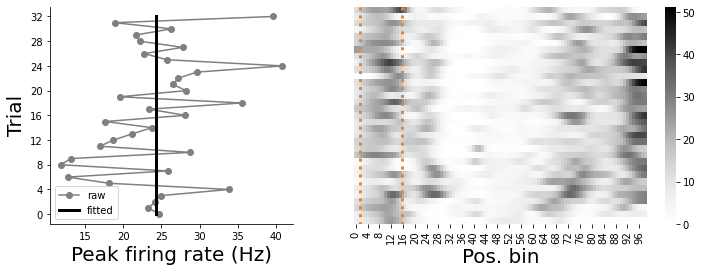

In [34]:
all_fields_row_one = all_fields_recombined.loc[0,'both',48,0]
plotfm.plot_ratemap_fr_one_field(all_fields_row_one,fr_map_trial_df,X_raw,X_pwc,all_sw_d,
                            trial_index_to_index_within_df,
                            save_fig_fn = None,
                            close_fig = False,
                                )